In [589]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# used with jupyter notebook to generate plots in this very same browser
%matplotlib inline

In [590]:
# loading data to a DataFrame object
try:
    df = pd.read_excel(
        "ozimmig.xlsx",
        sheet_name="all_by_country_birth",
        header=None,
        index_col=0)
except Exception as e:
    print(e)

In [591]:
# Transpose index & columns
df = df.T

# rename & modifying few column names
df.rename(
    columns={"Continent":"continent", "Region":"region", "Year":"country"},
    inplace=True)

# setting column "country" as index
df.set_index('country', drop=True, inplace=True)

In [592]:
# creat a list of just year coloumn names
year_list = df.columns.tolist()[2:]

# adding a new column for total immigrants per country
df["sum"] = df[year_list].sum(axis=1)

In [593]:
# statistics
max_mig = df[year_list].sum(axis=0).max()
min_mig = df[year_list].sum(axis=0).min()
total = df['sum'].sum()

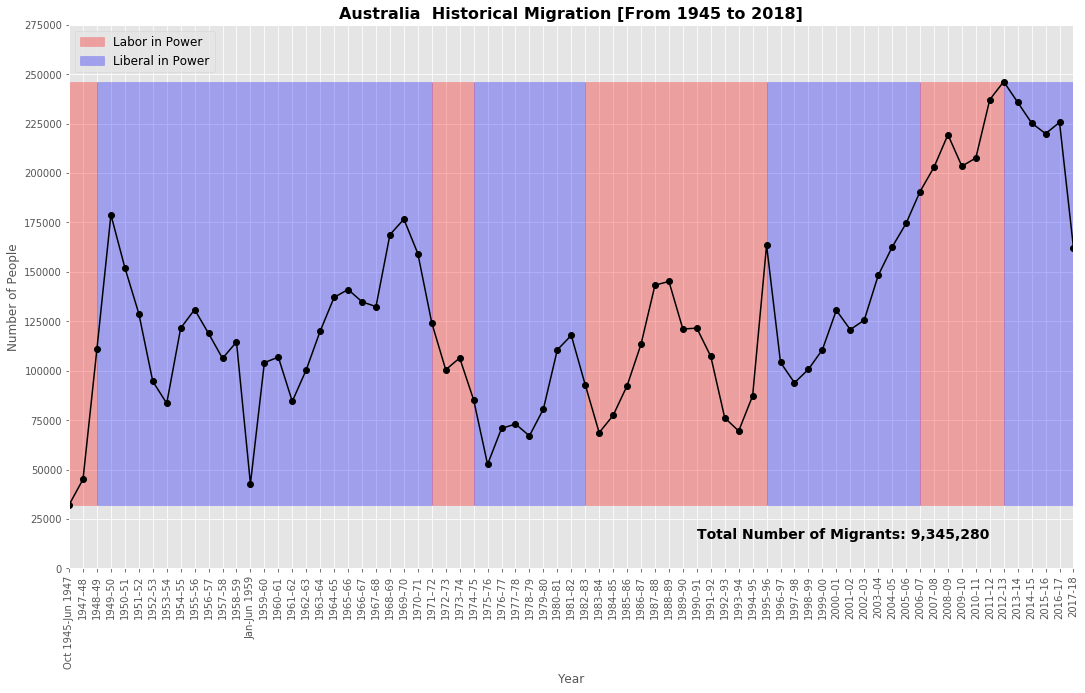

In [594]:
with plt.style.context('ggplot'):
    
    chart = df[year_list].sum().plot(kind='line', figsize=(18, 10), style=('k-o'))
    
    ax = plt.gca()
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of People")
    ax.set_xticks(np.arange(0, 73))
    ax.set_xticklabels(year_list, rotation=90)
    ax.set_yticks(np.arange(0, 300000, 25000))
    ax.set_title(
        "Australia  Historical Migration [From 1945 to 2018]",
        {'fontsize': 16, 'fontweight': 'bold'},
        loc='center'
    )
    
    patch1 = Rectangle((0, min_mig), 2, max_mig-min_mig, color='red', alpha=.3)
    patch2 = Rectangle((2, min_mig), 24, max_mig-min_mig, color='blue', alpha=.3)
    patch3 = Rectangle((26, min_mig), 3, max_mig-min_mig, color='red', alpha=.3)
    patch4 = Rectangle((29, min_mig), 8, max_mig-min_mig, color='blue', alpha=.3)
    patch5 = Rectangle((37, min_mig), 13, max_mig-min_mig, color='red', alpha=.3)
    patch6 = Rectangle((50, min_mig), 11, max_mig-min_mig, color='blue', alpha=.3)
    patch7 = Rectangle((61, min_mig), 6, max_mig-min_mig, color='red', alpha=.3)
    patch8 = Rectangle((67, min_mig), 5, max_mig-min_mig, color='blue', alpha=.3)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch4)
    ax.add_patch(patch5)
    ax.add_patch(patch6)
    ax.add_patch(patch7)
    ax.add_patch(patch8)
    
    ax.legend(
        [patch1, patch2],
        ['Labor in Power', 'Liberal in Power'],
        loc='upper left',
        fontsize='large'
    )
    
    ax.annotate(
        "Total Number of Migrants: {:,.0f}".format(total),
        (45, 15000),
        fontsize = 14,
        fontweight = 'bold'
    )
    
plt.show()
plt.close()

No handles with labels found to put in legend.


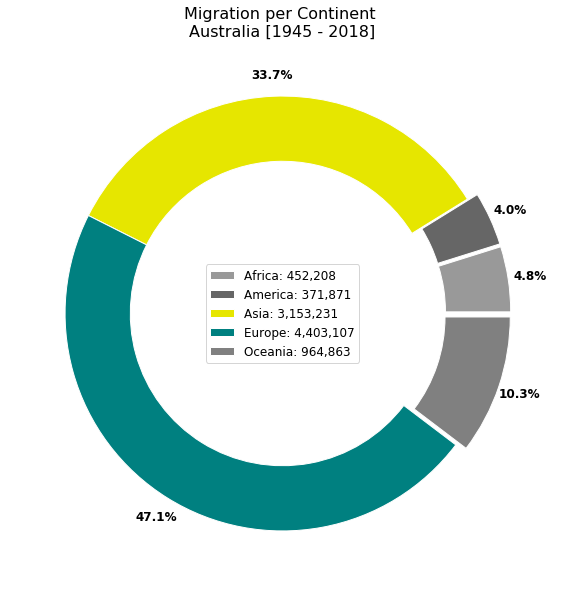

In [595]:
leg_hand = []
for continent in df.groupby('continent').sum().index:
    leg_hand.append("{}: {:,.0f}".format(continent, df.groupby('continent').sum().at[continent, 'sum']))

chart = df.groupby('continent').sum().plot(
    kind='pie', 
    subplots=True,
    figsize=(10, 10),
    colors=["#999999", "#666666", "#e6e600", "#008080", "#808080"],
    explode=[.05,.05,0,0,.05],
    autopct="%1.1f%%",
    pctdistance = 1.1,
    wedgeprops  = dict(width=0.3, edgecolor='w'),
    labels = None,
    textprops=dict(size=12, weight='bold')
)

ax = plt.gca()
ax.set_title("Migration per Continent \nAustralia [1945 - 2018]", fontsize=16)
ax.set_ylabel(None)
ax.legend(leg_hand, loc='center', fontsize='large')

plt.show()
plt.close()

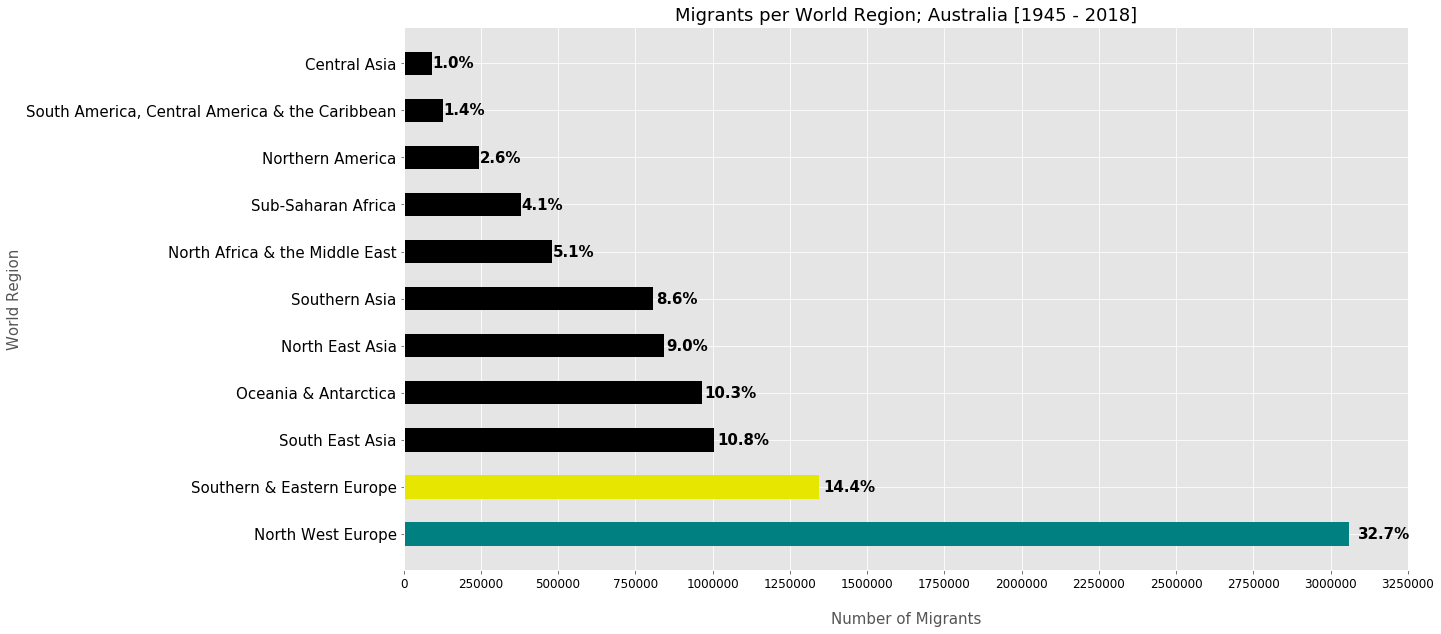

In [596]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(18, 10))
    chart = plt.barh(
        df.groupby('region').sum().sort_values('sum', axis=0, ascending=False).index,
        df.groupby('region').sum().sort_values('sum', axis=0, ascending=False)['sum'],
        height=.5,
        color=["#008080", "#e6e600", 'k', 'k','k','k','k','k','k','k','k'],
    )
    
    plt.yticks(fontsize=15, color='k')
    plt.xticks(fontsize=12, color='k')
    
    ax.set_title("Migrants per World Region; Australia [1945 - 2018]", fontsize=18)
    ax.set_xlabel("\nNumber of Migrants", fontsize=15)
    ax.set_ylabel("World Region", fontsize=15)
    ax.set_xticks(np.arange(0, 3500000, 250000))
    
    for bar in chart.patches:
        plt.text(1.01 * bar.get_width(), bar.get_y() + .3 * bar.get_height(), \
                 '{:.1%}'.format(bar.get_width() / df['sum'].sum()), dict(fontsize=15, fontweight='bold'))
        
    
plt.show()
plt.close()

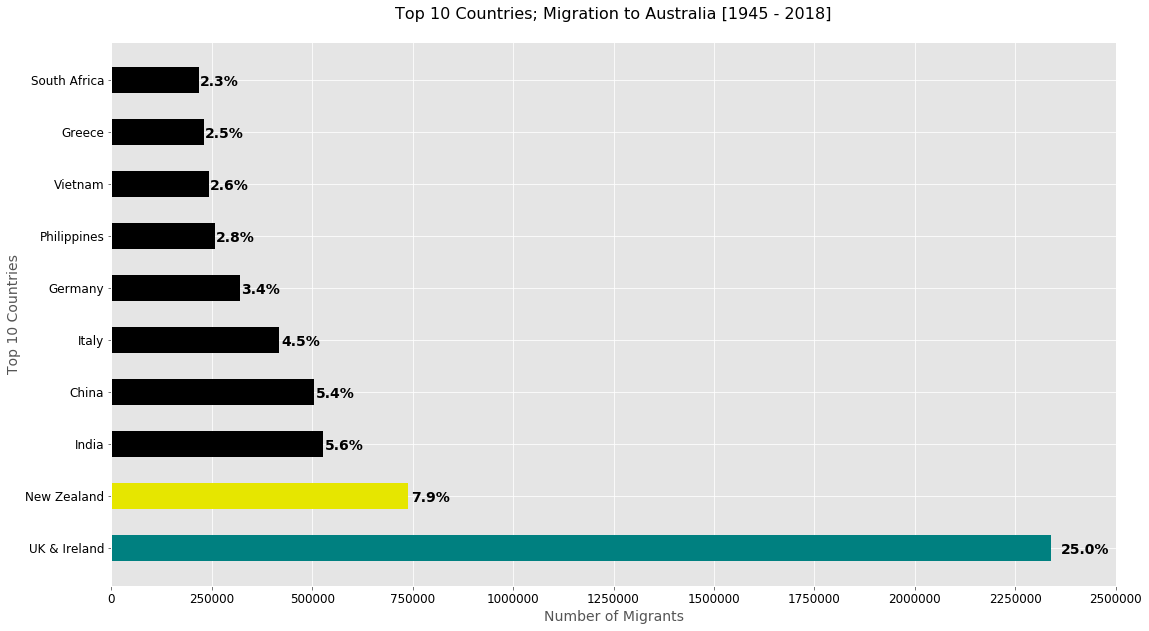

In [597]:
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(18, 10))
    
    chart = plt.barh(
        df['sum'].sort_values(ascending=False).head(10).index,
        df['sum'].sort_values(ascending=False).head(10).values,
        height=.5,
        color=["#008080", "#e6e600", 'k', 'k','k','k','k','k','k','k'],
    )
    
    plt.yticks(fontsize=12, color='k')
    plt.xticks(fontsize=12, color='k')
    
    ax.set_title("Top 10 Countries; Migration to Australia [1945 - 2018]\n", dict(fontsize=16))
    ax.set_xlabel("Number of Migrants", fontsize=14)
    ax.set_ylabel("Top 10 Countries", fontsize=14)
    ax.set_xticks(np.arange(0, 2750000, 250000))
    
    for bar in chart.patches:
        ax.text(1.01 * bar.get_width(), bar.get_y() + 0.3 * bar.get_height(), \
                 "{:.1%}".format(bar.get_width() / df['sum'].sum()), dict(fontsize=14, fontweight='bold', color='k'))

plt.show()
plt.close()

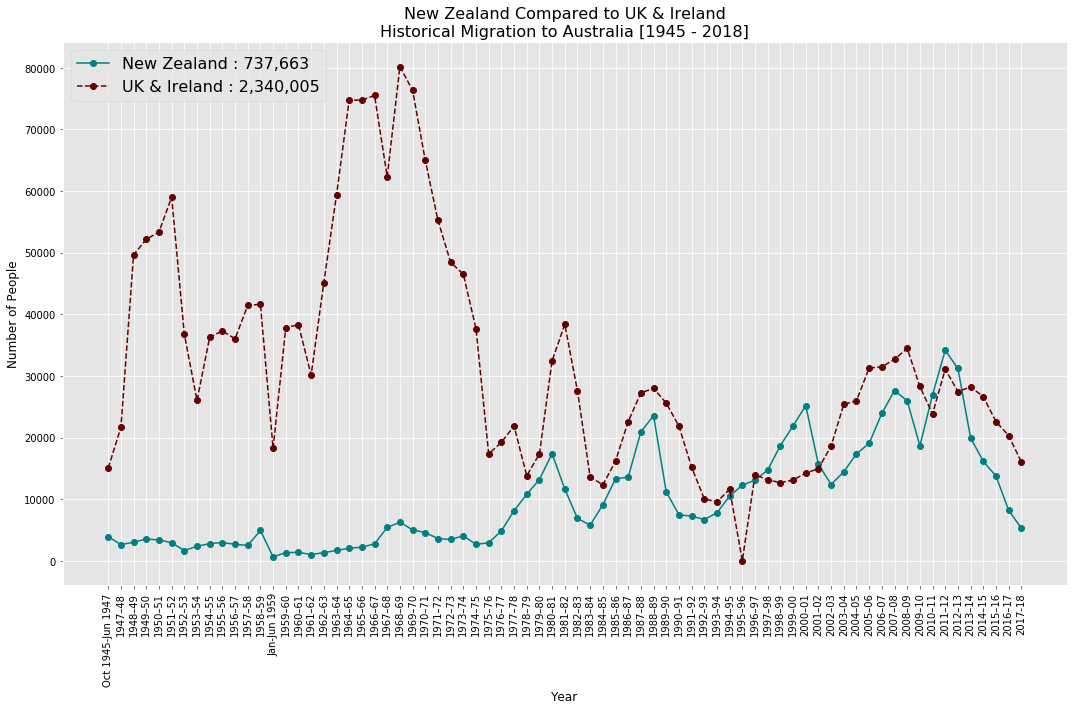

In [632]:
count1 = "New Zealand"
count2 = "UK & Ireland"
title = count1


with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(18, 10))
    
    line1 = plt.plot(
        df.loc[count1, year_list],
        '-o',
        color='#008080',
        label="{} : {:,.0f}".format(count1, df.loc[count1, 'sum']),
    )
    
    if count2:
        line2 = plt.plot(
            df.loc[count2, year_list],
            '--o',
            color='#660000',
            label="{} : {:,.0f}".format(count2, df.loc[count2, 'sum']),
        )
        
        title = title + " Compared to " + count2
        
    ax.legend(loc='upper left', fontsize=16)
    plt.xticks(rotation=90, color='k')
    plt.yticks(color='k')
    ax.set_xlabel("Year", dict(color='k', fontsize=12))
    ax.set_ylabel("Number of People", dict(color='k', fontsize=12))
    plt.title("{}\nHistorical Migration to Australia [1945 - 2018]".format(title), fontsize=16)
    
plt.show()
plt.close()

In [295]:
df.head(5)

,continent,region,Oct 1945-Jun 1947,1947–48,1948–49,1949–50,1950–51,1951–52,1952–53,1953–54,...,2009–10,2010–11,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17,2017-18,sum
country,,,,,,,,,,,,,,,,,,,,,
Australia & External Territories,Oceania,Oceania & Antarctica,0,0,0,0,0,0,0,0,...,2289,3113,4113,5582,5292,4869,5668,5425,0,76412.0
Cook Islands,Oceania,Oceania & Antarctica,0,0,0,0,0,0,0,0,...,156,236,298,331,250,193,192,92,0,5286.0
Fiji,Oceania,Oceania & Antarctica,282,200,190,180,245,196,300,284,...,1755,1651,1819,1656,1641,1278,1195,1035,536,71471.0
French Polynesia,Oceania,Oceania & Antarctica,0,0,0,0,0,0,0,0,...,10,14,10,12,8,14,6,9,0,408.0
Kiribati,Oceania,Oceania & Antarctica,0,0,0,0,0,0,0,0,...,17,9,6,11,8,21,29,34,5,442.0


In [631]:
df[df['1995–96'] == 0].index#.sort_values(axis=0)

Index(['Samoa', 'American Samoa', 'Vanuatu', 'Austria', 'Finland',
       'Luxembourg', 'Netherlands', 'Norway', 'Hungary', 'Kosovo', 'Latvia',
       'Former Serbia and Montenegro', 'Slovakia', 'Spain', 'Ukraine', 'Egypt',
       'Morocco', 'Oman', 'Qatar', 'South Sudan', 'Tunisia', 'Yemen',
       'Indonesia', 'Thailand', 'Taiwan', 'India', 'Nepal', 'Sri Lanka',
       'Botswana', 'Burundi', 'Cameroon', 'Chad', 'Republic Congo',
       'Côte d'Ivoire', 'Djibouti', 'Eritrea', 'Ghana', 'Kenya', 'Liberia',
       'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda', 'Senegal',
       'Swaziland', 'Tanzania', 'Uganda', 'USA', 'Argentina', 'Bahamas',
       'Barbados', 'Chile', 'Dominican Republic', 'Ecuador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Paraguay', 'Trinidad and Tobago',
       'Uruguay'],
      dtype='object', name='country')